In [429]:
import pandas as pd
import numpy as np

In [430]:
df = pd.read_csv('churn_raw_data.csv')

In [431]:
pd.set_option('max_columns', None)

In [432]:
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

# Plan! C.i - C.iv
1. Column names change to all lowercase. 
        ##columns.str.lower()
2. Drop columns: 'Unnamed: 0' and 'interaction'
        ## df_clean.drop(['unnamed: 0', 'interaction'], inplace = True)
3a. Find missing data - 
        ## columns: children, age, income, techie, phone, techsupport, tenure, bandwidth_gb_year.
3b. Impute missing values from #3 (if so, by mean/mode/median), or drop/delete?
        ## df['col1'].fillna(df['col1'].mean/mode/median(), inplace = True)
4. ReExpress categorical values to numeric
        ## setup dictionary for numeric cols
5. identify and handle outliers
        ## boxplots, hist, z-score
        ## z-score: import scipy (stats); df['var_z'] = stats.zscore(df['var'])
6. Standardize numeric fields - (from sklearn.decomposition import PCA)
        ## df_normal = (cols-cols.mean())/cols.std()
7. perform PCA on (native) numeric variables

In [434]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
#importing the above for future use. 

In [435]:
# copy the original to create df_clean
df_clean = df.copy()

In [436]:
# 1. lowercase column names
df_clean.columns = df_clean.columns.str.lower()

In [437]:
# verify 1 was executed properly 
df_clean.head(1)

,unnamed: 0,caseorder,customer_id,interaction,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.53611,5,5,5,3,4,4,3,4


In [438]:
# 2. drop columns
df_clean.drop(['unnamed: 0'], axis=1, inplace = True)

In [439]:
df_clean.drop(['interaction'], axis=1, inplace = True)

In [440]:
# verify drops were executed
df_clean.head(1)

,caseorder,customer_id,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.53611,5,5,5,3,4,4,3,4


In [441]:
# 3. Find missing data
df_clean.isna().sum()

caseorder                  0
customer_id                0
city                       0
state                      0
county                     0
zip                        0
lat                        0
lng                        0
population                 0
area                       0
timezone                   0
job                        0
children                2495
age                     2475
education                  0
employment                 0
income                  2490
marital                    0
gender                     0
churn                      0
outage_sec_perweek         0
email                      0
contacts                   0
yearly_equip_failure       0
techie                  2477
contract                   0
port_modem                 0
tablet                     0
internetservice            0
phone                   1026
multiple                   0
onlinesecurity             0
onlinebackup               0
deviceprotection           0
techsupport   

(array([1919., 1874., 1100., 1096.,  769.,  161.,  135.,  149.,  158.,
         144.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

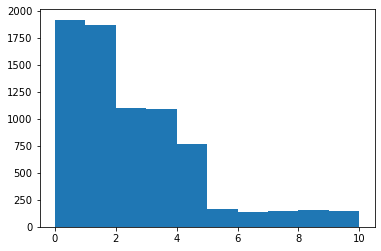

In [442]:
plt.hist(df_clean['children'])

In [443]:
print(df_clean['children'].mean())
print(df_clean['children'].median())
# my thought is to fill the NaN with zero since the higher numbers are not necessarily outliers based on the above plot.
# I see a blank answer as being zero.

2.095936042638241
1.0


(array([853., 756., 714., 739., 708., 739., 728., 728., 761., 799.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

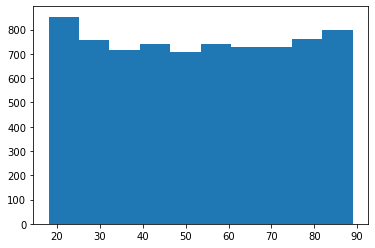

In [444]:
plt.hist(df_clean['age'])

In [445]:
print(df_clean['age'].mean())
print(df_clean['age'].median())
# I can use mean to impute missing data for age since above plot shows pretty even numbers across all ages, 
#    and the mean/median are fairly close as well.

53.27574750830565
53.0


(array([2.912e+03, 2.642e+03, 1.193e+03, 5.080e+02, 1.670e+02, 6.000e+01,
        2.100e+01, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([   740.66 ,  26556.664,  52372.668,  78188.672, 104004.676,
        129820.68 , 155636.684, 181452.688, 207268.692, 233084.696,
        258900.7  ]),
 <BarContainer object of 10 artists>)

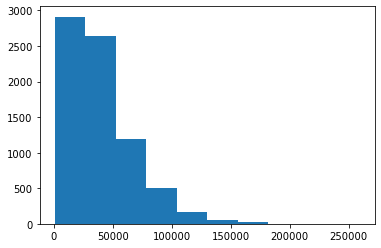

In [446]:
plt.hist(df_clean['income'])

In [447]:
print(df_clean['income'].mean())
print(df_clean['income'].median())
# I can use mean for this column as well. I don't see any outliers from the plot, nor from the mean/median.

39936.76222636489
33186.785


In [448]:
# 3b. Imputing/filling the missing values
df_clean['children'] = df_clean['children'].fillna(value = 0)

In [449]:
df_clean['techie'] = df_clean['techie'].fillna(value = 'No')

In [450]:
df_clean['phone'] = df_clean['phone'].fillna(value = 'No')

In [451]:
df_clean['techsupport'] = df_clean['techsupport'].fillna(value = 'No')

In [452]:
df_clean['tenure'] = df_clean['tenure'].fillna(value = 0)

In [453]:
df_clean['bandwidth_gb_year'] = df_clean['bandwidth_gb_year'].fillna(value = 0)

In [454]:
mean_value = df_clean['age'].mean()
print(mean_value)

53.27574750830565


In [455]:
df_clean['age'] = df_clean['age'].fillna(value = (mean_value))

In [456]:
mean_income = df_clean['income'].mean()
print(mean_income)

39936.76222636489


In [457]:
df_clean['income'] = df_clean['income'].fillna(value = (df_clean['income'].mean()))

In [459]:
# check for missing data again to verify I got all values. 
df_clean.head()

,caseorder,customer_id,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0.0,68.0,Master's Degree,Part Time,28561.990000,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.770000,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,39936.762226,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.230000,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.190000,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [460]:
import scipy.stats as stats
from pandas import DataFrame

(array([2.912e+03, 5.132e+03, 1.193e+03, 5.080e+02, 1.670e+02, 6.000e+01,
        2.100e+01, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([-1.59503068, -0.54448443,  0.50606183,  1.55660809,  2.60715434,
         3.6577006 ,  4.70824686,  5.75879311,  6.80933937,  7.85988562,
         8.91043188]),
 <BarContainer object of 10 artists>)

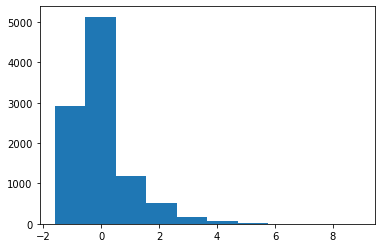

In [461]:
df_clean['zscoreincome']=stats.zscore(df_clean['income'])
plt.hist(df_clean['zscoreincome'])

From the above zscore plot, i don't see any outliers that might present a problem. 

## 4. reexpressing categorical values (only going to choose one currently)
# nominal data (one-hot encoding - not going to do this time)
# - area, employment, marital, gender, internet service, payment method
# ordinal data (ordinal encoding)
# - education, contract, all yes(1)/no(0) (ordinal or label encoding) answer columns

In [463]:
df_clean.contract.unique()

array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [464]:
contract_dict = {"contract_type_num": {"Month-to-month": 0, "One year": 1, "Two Year": 2}}

In [465]:
df_clean['contract_type_num'] = df_clean['contract']
df_clean.replace(contract_dict, inplace=True)

In [466]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   caseorder             10000 non-null  int64  
 1   customer_id           10000 non-null  object 
 2   city                  10000 non-null  object 
 3   state                 10000 non-null  object 
 4   county                10000 non-null  object 
 5   zip                   10000 non-null  int64  
 6   lat                   10000 non-null  float64
 7   lng                   10000 non-null  float64
 8   population            10000 non-null  int64  
 9   area                  10000 non-null  object 
 10  timezone              10000 non-null  object 
 11  job                   10000 non-null  object 
 12  children              10000 non-null  float64
 13  age                   10000 non-null  float64
 14  education             10000 non-null  object 
 15  employment          

In [467]:
# normalize data / apply PCA - what features?
df_clean_pca = df_clean[['children', 'age', 'income', 'tenure', 'monthlycharge']]

In [468]:
df_clean_pca_norm = (df_clean_pca-df_clean_pca.mean())/df_clean_pca.std()

In [469]:
pca = PCA(n_components=df_clean_pca.shape[1])
pca.fit(df_clean_pca_norm)

PCA(n_components=5)

In [470]:
df_clean_pca2 = pd.DataFrame(pca.transform(df_clean_pca_norm), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [471]:
loadings = pd.DataFrame(pca.components_.T,
                       columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
                       index=df_clean_pca_norm.columns)
loadings

,PC1,PC2,PC3,PC4,PC5
children,0.634511,0.114101,0.352751,-0.006186,-0.678163
age,-0.532522,0.130003,0.252320,-0.721973,-0.338540
income,0.192998,0.813383,0.274027,-0.116301,0.461025
tenure,-0.488527,0.454856,-0.050145,0.618032,-0.412273
monthlycharge,-0.194702,-0.318740,0.856911,0.288491,0.207299


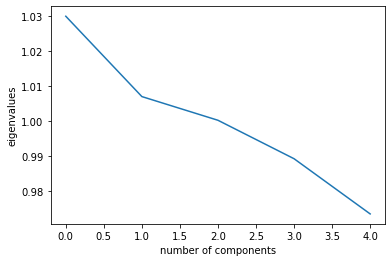

In [472]:
# get eigenvalues
cov_matrix = np.dot(df_clean_pca_norm.T, df_clean_pca_norm) / df_clean_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.show()

The data produced 5 PCs, and according to eigenvalues < 1, we're only going to keep PCs 1 and 2.

In [473]:
df_clean.to_csv(r'C:\Users\Nicole\Desktop\D206 Data Cleaning\Churn_cleaned.csv')